In [1]:
import pandas as pd

diseases = pd.read_csv('heart_disease_uci.csv')

print(diseases.isnull().sum())

#Fill Nulls for each column that missing values by loop
for col in diseases.columns:
    if diseases[col].isnull().sum() > 0:
        if diseases[col].dtype == 'object':
            diseases[col].fillna(diseases[col].mode()[0], inplace=True)
        else:
            diseases[col].fillna(diseases[col].mean(), inplace=True)

print("*****After filling nulls***** ")
print(diseases.isnull().sum())


id            0
age           0
gender        0
dataset       0
cp            0
trestbps     68
chol         33
fbs          90
restecg       2
thalch       64
exang        64
oldpeak      71
slope       332
ca          649
thal        513
num           0
dtype: int64
*****After filling nulls***** 
id          0
age         0
gender      0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [2]:
from scipy import stats

numeric_features = []

for col in diseases:
    if (diseases[col].dtype == 'int64' or diseases[col].dtype == 'float64') and col != 'id':
        numeric_features.append(col)
diseases_numeric = diseases[numeric_features]

#A z-score is how many standard deviations a value is from the mean of a dataset.
zscores_df = pd.DataFrame(stats.zscore(diseases_numeric),columns=diseases_numeric.columns,index=diseases_numeric.index ).abs()

#this is a statistical rule of thumb, that if a data is 3 std_deviations (or more) above or below the mean, it is considered an outlier
threshold = 3
outliers = (zscores_df > threshold).any(axis=1)

#backup our dataset
diseases_df_backup = diseases.copy()
diseases_df_numeric_backup = diseases_numeric.copy()

#print rows with outliers 
print(diseases_numeric[outliers])
print(f"number of outlier rows: {diseases_numeric[outliers].shape[0]}")

     age  trestbps   chol  thalch  oldpeak        ca  num
1     67     160.0  286.0   108.0      1.5  3.000000    2
40    65     150.0  225.0   114.0      1.0  3.000000    4
62    58     128.0  216.0   131.0      2.2  3.000000    1
91    62     160.0  164.0   145.0      6.2  3.000000    3
92    62     130.0  231.0   146.0      1.8  3.000000    0
104   49     120.0  188.0   139.0      2.0  3.000000    3
118   63     130.0  330.0   132.0      1.8  3.000000    3
121   63     150.0  407.0   154.0      4.0  3.000000    4
123   55     140.0  217.0   111.0      5.6  0.000000    3
126   56     200.0  288.0   133.0      4.0  2.000000    3
146   57     165.0  289.0   124.0      1.0  3.000000    4
152   67     115.0  564.0   160.0      1.6  0.000000    0
155   70     130.0  322.0   109.0      2.4  3.000000    1
161   77     125.0  304.0   162.0      0.0  3.000000    4
176   52     108.0  233.0   147.0      0.1  3.000000    0
179   53     130.0  246.0   173.0      0.0  3.000000    0
183   59     1

In [3]:
#removing outliers
diseases_numeric = diseases_numeric.loc[~outliers].copy()
diseases = diseases.loc[~outliers].copy()

assert diseases.index.equals(diseases_numeric.index), "Indices misaligned!"

print(f"rows before cleaning: {diseases_df_backup.shape[0]} rows after cleaning: {diseases.shape[0]}")


rows before cleaning: 958 rows after cleaning: 921


In [4]:
print(diseases.dtypes)
#re-typing floats to integers
for col in diseases:
    if diseases[col].dtype == 'float64' and col != 'oldpeak':
        diseases[col] = diseases[col].astype('int64')

print('***  AFTER RETYPING  ***')
print(diseases.dtypes)

id            int64
age           int64
gender       object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
***  AFTER RETYPING  ***
id            int64
age           int64
gender       object
dataset      object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
ca            int64
thal         object
num           int64
dtype: object


In [5]:
#check for duplicates
#diseases.duplicated() is a T/F 
duplicates = diseases[diseases.duplicated()]
print(duplicates)
#in case there were duplicates
# diseases = diseases.drop_duplicates()
# diseases.reset_index(drop=True, inplace=True)

Empty DataFrame
Columns: [id, age, gender, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [6]:
#feature label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#dictionary to store all our encoded mappings
label_mappings = {}
#copy diseases dataset to keep original values
encoded_diseases = diseases.copy()

encoded_features = []
# Loop through all categorical columns
for col in diseases.select_dtypes(include=['object']).columns:
    encoded_features.append(col)
    le = LabelEncoder() #restart the encoder for each column
    encoded_diseases[col] = le.fit_transform(encoded_diseases[col]) #encode the values
    label_mappings[col] = {label: i for i, label in enumerate(le.classes_)} 
#le.classes_ returns a list of all categories in a column, and their index
#example --> enumerate(diseases['gender']) returns ('male',0) and ('female', '1')

# Display mappings
for col, mapping in label_mappings.items():
    print(f"\nColumn '{col}':")
    for key, value in mapping.items():
        print(f"{key} --> {value}")
#label_mappings stores tuple of the key-value pairs like this  ('slope', {'downsloping': 0, 'flat': 1, 'upsloping ': 2})
#                                                              ('gender', {'male': 0, 'female': 1})

#label_mappings['Color'] = {'Blue': 0, 'Green': 1, 'Red': 2}

encoded_diseases = encoded_diseases[encoded_features]

encoded_diseases.head()


Column 'gender':
Female --> 0
Male --> 1

Column 'dataset':
Cleveland --> 0
Hungary --> 1
Switzerland --> 2
VA Long Beach --> 3

Column 'cp':
asymptomatic --> 0
atypical angina --> 1
non-anginal --> 2
typical angina --> 3

Column 'restecg':
lv hypertrophy --> 0
normal --> 1
st-t abnormality --> 2

Column 'slope':
downsloping --> 0
flat --> 1
upsloping --> 2

Column 'thal':
fixed defect --> 0
normal --> 1
reversable defect --> 2


,gender,dataset,cp,restecg,slope,thal
0,1,0,3,0,0,0
2,1,0,0,0,1,2
3,1,0,2,1,0,1
4,0,0,1,0,2,1
5,1,0,1,1,2,1


In [7]:
#feature scaling
#on numeric values only
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diseases_numeric_scaled = diseases_numeric.copy()

print(diseases_numeric.columns)
features_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
#excluding num since it's our target value, and excluding id since it doesn't represent anything numeric
diseases_numeric_scaled[features_to_scale] = scaler.fit_transform(diseases_numeric_scaled[features_to_scale])

diseases_numeric_scaled.head(10)



Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


,age,trestbps,chol,thalch,oldpeak,ca,num
0,0.999751,0.778465,0.321838,0.513828,1.482651,-1.521278,0
2,1.424853,-0.693813,0.283992,-0.323253,1.788012,3.336464,1
3,-1.763411,-0.104902,0.482682,1.988686,2.704097,-1.521278,0
4,-1.338309,-0.104902,0.047456,1.390771,0.566566,-1.521278,0
5,0.255823,-0.693813,0.350222,1.629937,-0.044158,-1.521278,0
6,0.893475,0.484009,0.652988,0.912439,2.805885,3.336464,3
7,0.362098,-0.693813,1.466671,1.032022,-0.247732,-1.521278,0
8,0.999751,-0.104902,0.520528,0.394245,0.566566,0.907593,2
9,-0.063004,0.484009,0.037995,0.713133,2.296949,-1.521278,1
10,0.362098,0.484009,-0.066081,0.434106,-0.451307,-1.521278,0


In [8]:
#add T/F columns and the id 
additional_cols = diseases.loc[:,['id','fbs','exang']]

#merge all together
diseases_encoded_scaled = pd.concat(   [encoded_diseases, diseases_numeric_scaled,additional_cols]   , axis=1)
diseases_encoded_scaled.head()

,gender,dataset,cp,restecg,slope,thal,age,trestbps,chol,thalch,oldpeak,ca,num,id,fbs,exang
0,1,0,3,0,0,0,0.999751,0.778465,0.321838,0.513828,1.482651,-1.521278,0,1,True,False
2,1,0,0,0,1,2,1.424853,-0.693813,0.283992,-0.323253,1.788012,3.336464,1,3,False,True
3,1,0,2,1,0,1,-1.763411,-0.104902,0.482682,1.988686,2.704097,-1.521278,0,4,False,False
4,0,0,1,0,2,1,-1.338309,-0.104902,0.047456,1.390771,0.566566,-1.521278,0,5,False,False
5,1,0,1,1,2,1,0.255823,-0.693813,0.350222,1.629937,-0.044158,-1.521278,0,6,False,False


In [9]:
# Check if indices align
print(encoded_diseases.index.equals(diseases_numeric_scaled.index)) 
print(encoded_diseases.index.equals(additional_cols.index))         

True
True


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components =  4)
pca_components = pca.fit_transform(diseases_numeric_scaled)

pca_df = pd.DataFrame(pca_components)
print(pca_df)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")


            0         1         2         3
0   -0.172366  1.662857 -0.694571 -1.388347
1    2.193329  0.183564  2.074300  2.058115
2   -1.707578  1.298994  1.758597 -2.809042
3   -1.980912  0.376759  0.332480 -1.678407
4   -1.804937  0.377613 -0.051400 -1.004206
..        ...       ...       ...       ...
916 -0.833559  0.526254  0.456474  0.688007
917 -0.025189 -0.060413 -0.688646  0.398509
918  0.845693 -0.832033 -0.341556  0.568680
919 -0.672659  1.394144  0.200391  0.847456
920  0.602861 -0.488944 -0.825516  1.114807

[921 rows x 4 columns]
Explained variance by each component: [0.32735188 0.1628223  0.13227172 0.1221086 ]


In [11]:
#analyze how much each feature contributes to each principal component.
pca_loadings = pd.DataFrame(pca.components_, columns=diseases_numeric_scaled.columns)

# Print the loadings
print(pca_loadings)

        age  trestbps      chol    thalch   oldpeak        ca       num
0  0.423814  0.194666 -0.200775 -0.413844  0.368801  0.291024  0.591777
1  0.189780  0.625916  0.659603  0.174994  0.285939 -0.087144 -0.130991
2 -0.346596 -0.412473  0.318666  0.378019  0.427626  0.461976  0.262688
3  0.220520  0.005225  0.233163 -0.170981 -0.484736  0.749468 -0.266595


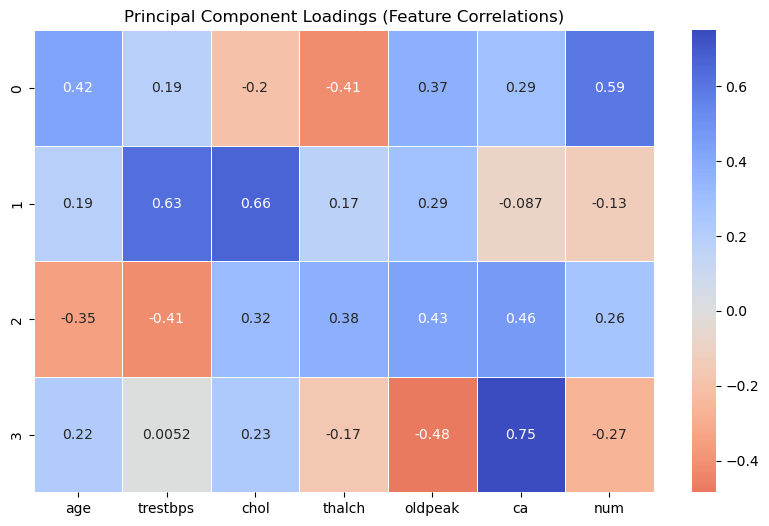

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pca_loadings, annot=True, cmap="coolwarm_r", center=0, linewidths=0.5)
plt.title("Principal Component Loadings (Feature Correlations)")
plt.show()

In [13]:
#checking for imbalance in our future target variable
#count number of rows in each class 'num'

num_count = {}
for value in diseases['num']:
    if value in num_count:
        num_count[value] += 1
    else:
        num_count[value] = 1

for key , value in num_count.items():
    print(f"{value} rows belong to class num {key} which is {value/diseases.shape[0] * 100.0:.2f}% of the dataset ")    

415 rows belong to class num 0 which is 45.06% of the dataset 
268 rows belong to class num 1 which is 29.10% of the dataset 
104 rows belong to class num 3 which is 11.29% of the dataset 
111 rows belong to class num 2 which is 12.05% of the dataset 
23 rows belong to class num 4 which is 2.50% of the dataset 


In [14]:
#first imbalance resolving technique
#using SMOTE to oversample minority classes
#SMOTE 
#only works on numeric data 
#should be applied to training dataset only

from imblearn.over_sampling import SMOTE

#removing 'num' since it's the target
X = diseases_encoded_scaled.drop(columns='num') 
y = diseases_encoded_scaled['num']

smote = SMOTE(random_state=42)
trainig_features_resampled, target_feature_resampled = smote.fit_resample(X, y)

In [15]:
import pandas as pd

# Count the occurrences of each class after resampling
class_counts = target_feature_resampled.value_counts()
class_percentages = target_feature_resampled.value_counts(normalize=True) * 100

#print
for cols in class_counts.index:
    count = class_counts[cols]
    percent = class_percentages[cols]
    print(f"Class {cols}: {count} samples ({percent:.2f}%)")


Class 0: 415 samples (20.00%)
Class 1: 415 samples (20.00%)
Class 3: 415 samples (20.00%)
Class 2: 415 samples (20.00%)
Class 4: 415 samples (20.00%)


In [16]:
print(trainig_features_resampled.shape)

(2075, 15)


In [17]:
#imbalance handling technique 2: undersampling using RUS 
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Features and target
X = diseases_encoded_scaled.drop(columns='num')
y = diseases_encoded_scaled['num']

# Apply RUS
rus = RandomUnderSampler(random_state=42)
training_features_resampled_rus, target_feature_resampled_rus = rus.fit_resample(X, y)

# Count the occurrences of each class after under-sampling
class_counts_rus = target_feature_resampled_rus.value_counts()
class_percentages_rus = target_feature_resampled_rus.value_counts(normalize=True) * 100

#print counts and percentages
for cols in class_counts_rus.index:
    print(f"Class {cols}: {class_counts_rus[cols]} samples ({class_percentages_rus[cols]:.2f}%)")


Class 0: 23 samples (20.00%)
Class 1: 23 samples (20.00%)
Class 2: 23 samples (20.00%)
Class 3: 23 samples (20.00%)
Class 4: 23 samples (20.00%)


In [18]:
print(training_features_resampled_rus.shape)

(115, 15)


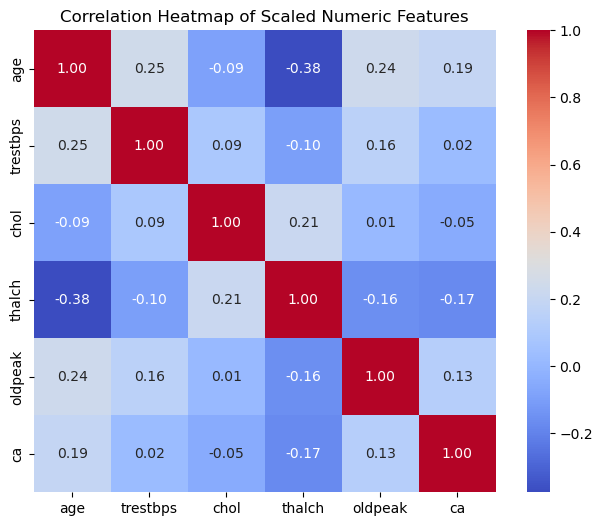

In [19]:
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

correlation_matrix = diseases_numeric_scaled[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Scaled Numeric Features')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = trainig_features_resampled
y = target_feature_resampled

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Train 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on original (non-resampled) test set
y_pred = rf.predict(X_test)

# Evaluate
print("Random Forest without PCA")
print(classification_report(y_test, y_pred))

Random Forest without PCA
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        83
           1       0.83      0.77      0.80        83
           2       0.90      0.89      0.90        83
           3       0.93      0.89      0.91        83
           4       0.93      1.00      0.97        83

    accuracy                           0.89       415
   macro avg       0.89      0.89      0.89       415
weighted avg       0.89      0.89      0.89       415



In [21]:
from sklearn.decomposition import PCA

# Reduce to 4 principal components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model on PCA features
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predict on PCA-transformed test set
y_pred_pca = rf_pca.predict(X_test_pca)

# Evaluate
print("Random Forest with PCA")
print(classification_report(y_test, y_pred_pca))

Random Forest with PCA
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        83
           1       0.77      0.77      0.77        83
           2       0.79      0.75      0.77        83
           3       0.78      0.84      0.81        83
           4       0.86      0.89      0.88        83

    accuracy                           0.81       415
   macro avg       0.81      0.81      0.81       415
weighted avg       0.81      0.81      0.81       415



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = trainig_features_resampled
y = target_feature_resampled

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression on resampled data
lr = LogisticRegression(max_iter=5000, solver='saga', random_state=42)
lr.fit(X_train, y_train)

# Predict on original test set
y_pred = lr.predict(X_test)

# Evaluate
print("Logistic Regression without PCA")
print(classification_report(y_test, y_pred))

Logistic Regression without PCA
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        83
           1       0.46      0.45      0.45        83
           2       0.29      0.22      0.25        83
           3       0.47      0.41      0.44        83
           4       0.48      0.60      0.53        83

    accuracy                           0.49       415
   macro avg       0.48      0.49      0.48       415
weighted avg       0.48      0.49      0.48       415



In [23]:
from sklearn.decomposition import PCA

# Reduce to 4 principal components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model on PCA features
lr_pca = RandomForestClassifier(random_state=42)
lr_pca.fit(X_train_pca, y_train)

# Predict on PCA-transformed test set
y_pred_pca = lr_pca.predict(X_test_pca)

print("Logistic Regression with PCA")
print(classification_report(y_test, y_pred_pca))

Logistic Regression with PCA
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        83
           1       0.77      0.77      0.77        83
           2       0.79      0.75      0.77        83
           3       0.78      0.84      0.81        83
           4       0.86      0.89      0.88        83

    accuracy                           0.81       415
   macro avg       0.81      0.81      0.81       415
weighted avg       0.81      0.81      0.81       415



In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train
svm_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
print("SVM WITHOUT PCA")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM WITHOUT PCA
Accuracy: 0.8217
Precision (macro): 0.8236
Recall (macro): 0.8217
F1-score (macro): 0.8221
Confusion Matrix:
[[67 13  1  1  1]
 [ 5 67  4  5  2]
 [ 1  6 68  4  4]
 [ 1  2  4 68  8]
 [ 3  1  3  5 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        83
           1       0.75      0.81      0.78        83
           2       0.85      0.82      0.83        83
           3       0.82      0.82      0.82        83
           4       0.83      0.86      0.84        83

    accuracy                           0.82       415
   macro avg       0.82      0.82      0.82       415
weighted avg       0.82      0.82      0.82       415



In [25]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train 
svm_pca_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
svm_pca_model.fit(X_train_pca, y_train)

# Predict
y_pred_pca = svm_pca_model.predict(X_test_pca)

# Evaluate
print("SVM WITH PCA")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_pca, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_pca, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_pca, average='macro'):.4f}")

# Confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix (PCA):")
print(cm_pca)

print("\nClassification Report (PCA):")
print(classification_report(y_test, y_pred_pca))

SVM WITH PCA
Accuracy: 0.7036
Precision (macro): 0.7060
Recall (macro): 0.7036
F1-score (macro): 0.7041
Confusion Matrix (PCA):
[[63 11  3  5  1]
 [ 9 54  7 11  2]
 [ 1  8 55  7 12]
 [ 0  5  8 57 13]
 [ 3  2  9  6 63]]

Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        83
           1       0.68      0.65      0.66        83
           2       0.67      0.66      0.67        83
           3       0.66      0.69      0.67        83
           4       0.69      0.76      0.72        83

    accuracy                           0.70       415
   macro avg       0.71      0.70      0.70       415
weighted avg       0.71      0.70      0.70       415



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


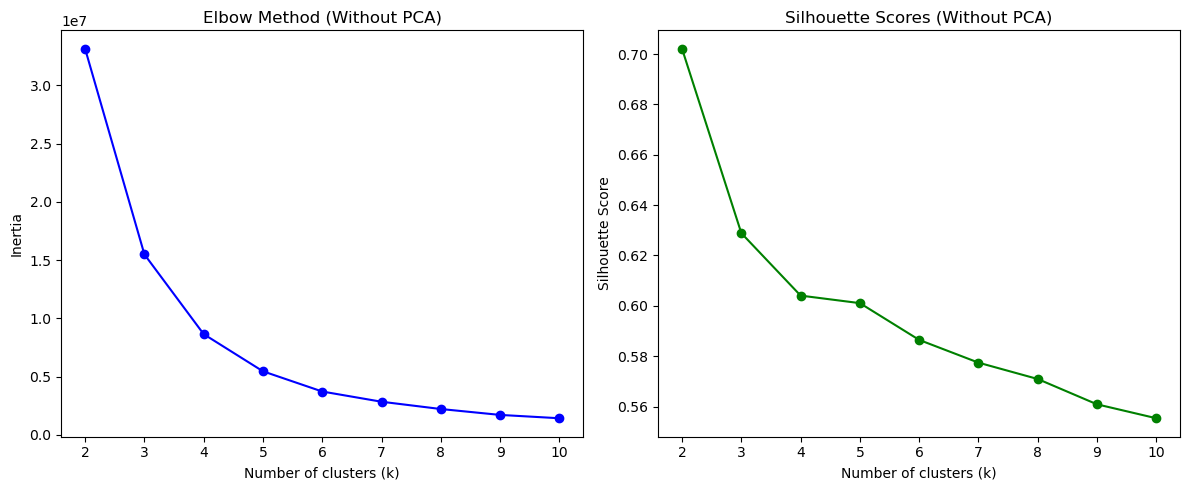

In [26]:
# Elbow Method and Silhouette Score (Without PCA)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Without PCA)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (Without PCA)')

plt.tight_layout()
plt.show()

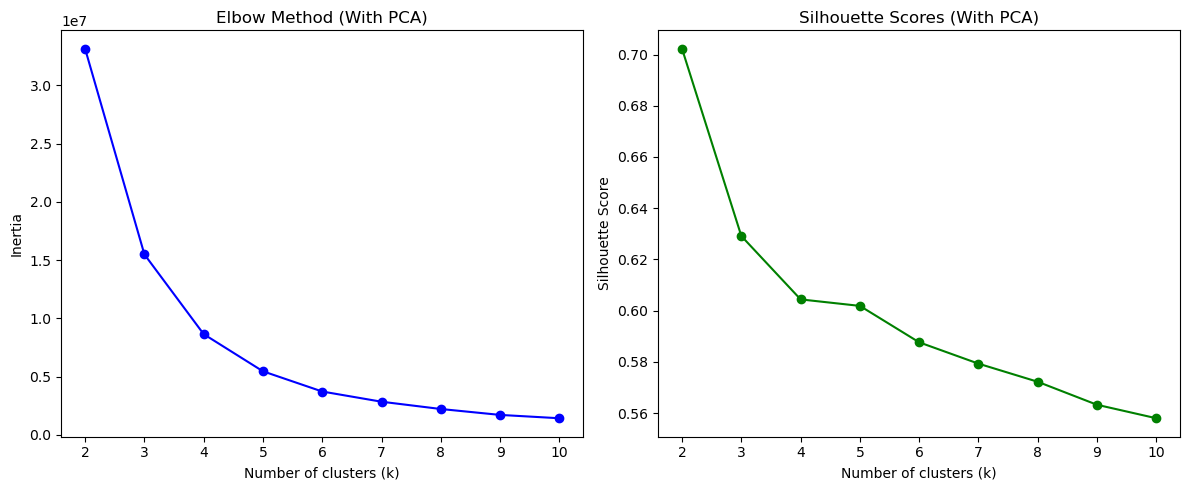

In [27]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

inertia_pca = []
silhouette_pca = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_pca.append(kmeans.inertia_)
    silhouette_pca.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow and Silhouette Scores (With PCA)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_pca, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (With PCA)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_pca, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (With PCA)')

plt.tight_layout()
plt.show()

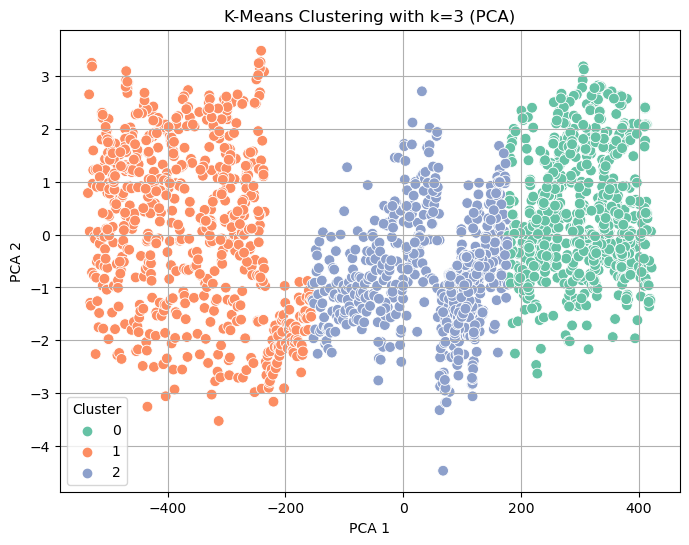

Silhouette Score with k=3 (PCA): 0.6291


In [28]:
import seaborn as sns
optimal_k = 3  # this value based on the elbow/silhouette method

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_final.fit_predict(X_pca)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title(f'K-Means Clustering with k={optimal_k} (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Final Silhouette Score
final_silhouette = silhouette_score(X_pca, labels)
print(f"Silhouette Score with k={optimal_k} (PCA): {final_silhouette:.4f}")